## Project description: 
This project uses data from discussion threads from of 28 Coursera MOOCs, as well as, focuses on the user interaction revealed by their online activities of forum posts and replies. All of these 28 Coursera MOOCs focus on quantitative knowledge and programing skills including data analytics, machine learning, finance, statistics, etc. This project aims to use exploratory data analysis and data visualization to answer the questions in the following:

1. What is the relation between the number of course users, number of forum posts, and views of forum posts?    
2. Using frequency counts and time lapse for post replies as index for user interaction, which course has the highest/lowest user interaction?    
3. What is the ratio of forum posts by different types of participants across 28 courses? What is the general pattern of post replies? Does a forum post elicit many replies mostly from a few users (concentrated) or fewer replies but from several users (spread out)?     
4. What is the general pattern of post replies to the same original forum post initiator(i.e. how and how many replies are given to a person who asks a question)?   


#### data source:
Language independent analysis and classification of discussion threads in coursera MOOC forums, by Lorenzo A. Rossi and Omprakash Gnawali, IEEE International Conference on Information Reuse and Integration (IRI), August 2014.

```
BiBTeX entry for data source
@inproceedings{coursera-iri2014,
   author = {Lorenzo A. Rossi and Omprakash Gnawali},
   title = {{Language Independent Analysis and Classification of Discussion Threads in Coursera MOOC Forums}},
   booktitle = {Proceedings of the IEEE International Conference on Information Reuse and Integration (IRI 2014)},
   month = aug,
   year = {2014}
}
```

In [220]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load in data

In [221]:
df_course_info=pd.read_csv('course_information.csv')
df_thread=pd.read_csv('course_threads.csv')
df_post=pd.read_csv('course_posts.csv')

In [222]:
df_course_info.head()

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392
2,Automata,automata-002,6,9,11/4/2013,NaN,Q,E,429,NaN,493
3,Big Data in Education,bigdata-edu-001,8,7,10/24/2013,NaN,?,E,585,NaN,710
4,Bioinformatics Algorithms (Part 1),bioinformatics-001,12,9,11/4/2013,1/27/2014,Q,E,1160,NaN,941


In [223]:
df_thread.head()

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
1,3,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,572,0,13
2,4,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,196,0,13
3,7,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,135,0,13
4,8,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,188,0,13


In [224]:
df_post.head()

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,3,2,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,4,2,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,7,2,analysenumerique-001,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,8,2,analysenumerique-001,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,15,2,analysenumerique-001,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [225]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739074 entries, 0 to 739073
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   post_id     739074 non-null  int64  
 1   thread_id   739074 non-null  int64  
 2   course_id   739074 non-null  object 
 3   parent_id   739074 non-null  int64  
 4   order       739074 non-null  int64  
 5   user_id     739074 non-null  int64  
 6   user_type   739074 non-null  object 
 7   post_time   739074 non-null  int64  
 8   relative_t  739074 non-null  float64
 9   votes       739074 non-null  int64  
 10  num_words   739074 non-null  int64  
 11  forum_id    739074 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 67.7+ MB


# Data cleaning and Wrangling
#### Goal:

To query quantative and english intruction only<br>
To merge the dataframe based on the columns that are key to the question

#### Quantative and english instruction only

In [226]:
df_course_info=df_course_info.query('type=="Q" & language=="E"')

In [227]:
df_course_info.shape

(28, 11)

Now we have 28 quantative- and programing-related courses taught in English

In [228]:
course_id=df_course_info.course_id
df_thread=df_thread[df_thread.course_id.isin(course_id)]
df_post=df_post[df_post.course_id.isin(course_id)] # use isin() to check if one value is in some list

## 1. What is the relation between the number of course users, number of forum posts, and views of forum posts?

In [229]:
# groupby the thread and post to calculate the num of  view and post
thread_post_count=(df_post.groupby(['course_id']).course_id.count()).to_frame()
thread_post_count = thread_post_count.rename(columns = {"course_id":"post_count"}).reset_index()
thread_post_count.head()

,course_id,post_count
0,assetpricing-001,3025
1,automata-002,2715
2,bioinformatics-001,9258
3,compilers-003,2428
4,compmethods-004,1065


In [230]:
thread_view_count=(df_thread.groupby('course_id').num_views.sum()).to_frame().reset_index()
thread_view_count.head()

,course_id,num_views
0,assetpricing-001,68171
1,automata-002,57548
2,bioinformatics-001,189820
3,compilers-003,55815
4,compmethods-004,29567


In [231]:
#add all the aggregate data to df_course_info and create a new df called df_q1
df_q1=df_course_info.merge(thread_post_count,how='left',left_on='course_id',right_on='course_id')
df_q1=df_q1.merge(thread_view_count,how='left',left_on='course_id',right_on='course_id')
df_q1.head()


,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users,post_count,num_views
0,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392,3025,68171
1,Automata,automata-002,6,9,11/4/2013,NaN,Q,E,429,NaN,493,2715,57548
2,Bioinformatics Algorithms (Part 1),bioinformatics-001,12,9,11/4/2013,1/27/2014,Q,E,1160,NaN,941,9258,189820
3,Compilers,compilers-003,12,15,2/11/2013,NaN,Q,E,436,NaN,355,2428,55815
4,Computational Methods for Data Analysis,compmethods-004,10,11,1/6/2014,NaN,Q,E,188,NaN,269,1065,29567


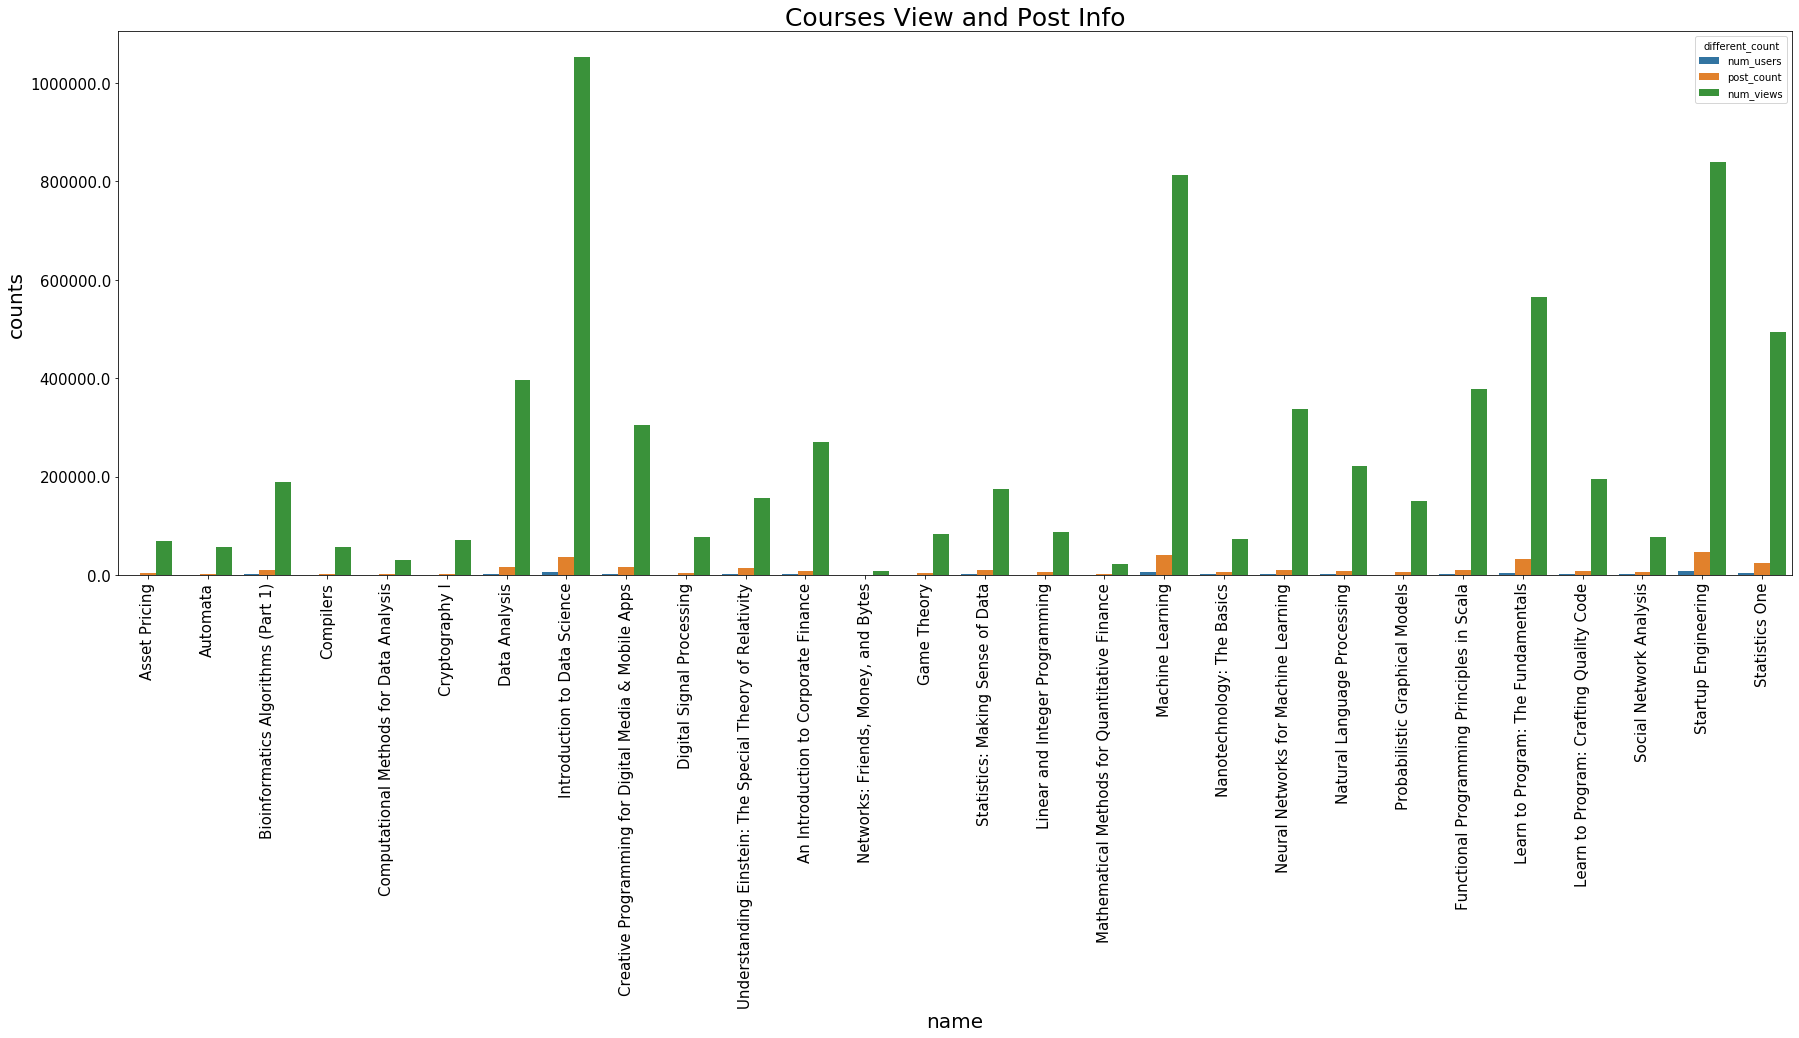

In [232]:
# plot a barplot to see the values of different classes
# barpolt which share 
plt.figure(figsize=(30,10))
df_q11=df_q1[['name','num_users','post_count','num_views']]

columns=df_q11.columns 
# here to plot mulyiple graphs using same x-axis, we need to transform the wide data into long data
# by using pd.melt(df, id_vars=unchanged column name, var_name= key, value_name= value)

q1_melted = pd.melt(df_q11, id_vars=columns[0],
                           var_name="different_count", value_name="value_numbers")

g = sns.barplot(x=columns[0], y="value_numbers", hue="different_count",
                data=q1_melted)

g.set_xticklabels(g.get_xticklabels(), rotation=90,fontsize=15)
g.set_xlabel(g.get_xlabel(),fontsize=20)
g.set_yticklabels(g.get_yticks(), size=15)
g.set_ylabel('counts',fontsize=20)
g.set_title('Courses View and Post Info',fontsize=25)
plt.show()



In [233]:
#creating df  with numeric var's only based on df_course_info
df_q1=df_q1.select_dtypes(include=['float64','int64'])
df_q1.head()

,weeks,num_threads,num_users,post_count,num_views
0,9,673,392,3025,68171
1,6,429,493,2715,57548
2,12,1160,941,9258,189820
3,12,436,355,2428,55815
4,10,188,269,1065,29567


## pairwise scatter plot

<Figure size 1440x720 with 0 Axes>

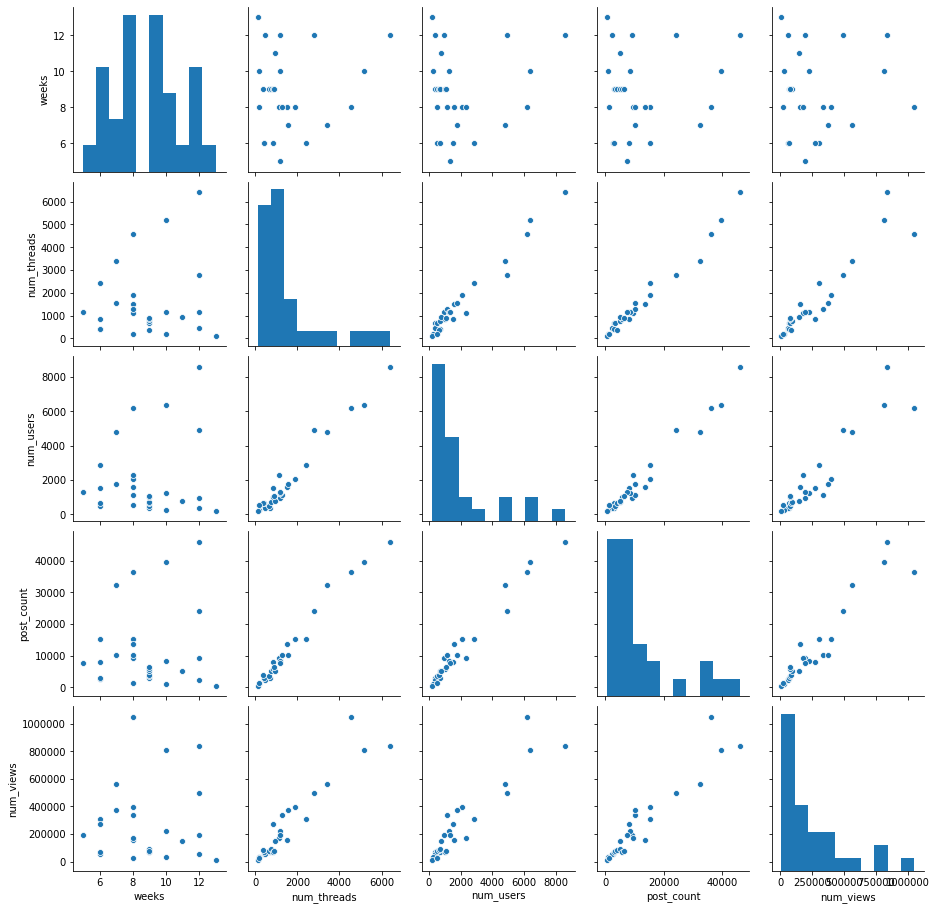

In [234]:
# paiwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(df_q1)

We could see some linearity between some variables, we could use a correlation matrix to present the correlation coefficient in form of heatmap

## Correlation Matrix

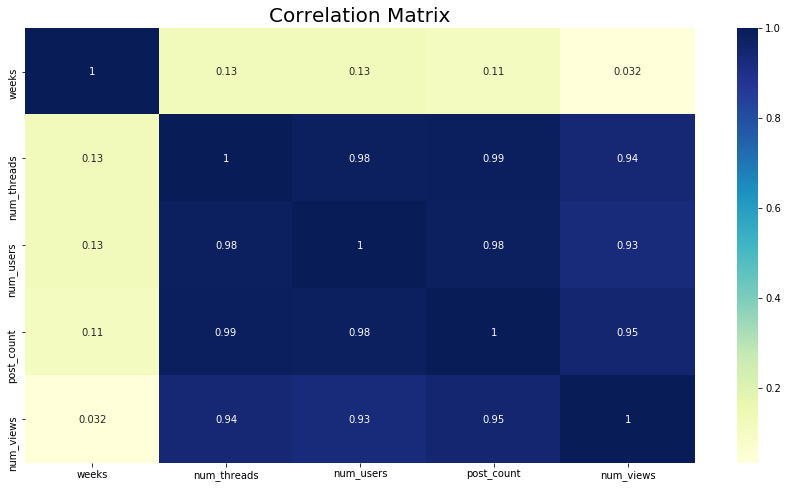

In [235]:
corr=df_q1.corr()

plt.figure(figsize=(15,8))
gg=sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.title('Correlation Matrix',fontsize=20)
plt.show()

Q1 answer:<br>

The num of user are highly correlated to num of post and num_of view, the more users we have the more post and moer views we have and vice versa. Comparatively, though remain strong correlation with num of the user, num of view correlated less strongly with num of user than the post_count did.

We could to some extent extrapolate that students were less likely to view after posting their work.

How long to finish a course appears to have little relationship with the num of users, num of views as well as num of posts.

## 2. Using frequency counts and time lapse for post replies as index for user interaction, which course has the highest/lowest user interaction?    

In [236]:
df_post.head(60)

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
741,1,1,assetpricing-001,0,1,2255349141,Staff,1379779525,-0.132215,13,119,10003
742,4,1,assetpricing-001,0,2,1374710630,Student,1379780816,-0.131978,1,78,10003
743,5,1,assetpricing-001,0,3,9965686033,Student,1379781222,-0.131904,1,33,10003
744,6,1,assetpricing-001,0,4,5400683368,Student,1379782407,-0.131686,0,36,10003
745,7,1,assetpricing-001,0,5,0,Anonymous,1379783621,-0.131463,1,38,10003
746,1,1,assetpricing-001,4,0,2255349141,Staff,1379784486,-0.131304,9,220,10003
747,8,1,assetpricing-001,0,6,0,Anonymous,1379784851,-0.131237,0,80,10003
748,9,1,assetpricing-001,0,7,5925192760,Student,1379785319,-0.131151,0,63,10003
749,10,1,assetpricing-001,0,8,9572116597,Student,1379786429,-0.130947,0,24,10003
750,11,1,assetpricing-001,0,9,0,Anonymous,1379786657,-0.130905,0,26,10003


In [237]:
import datetime as dt

In [238]:
#converting the timestamp to datetime
df_post['post_time']=df_post['post_time'].apply(dt.datetime.fromtimestamp)
#print(dt.datetime.fromtimestamp(1379779525))

In [239]:
# feature engineer vairables for user interaction: 
#(1) who replied to whose post, (2) time lapse between post & reply

df_usr_inter=df_post[['user_id', 'parent_id', 'post_id', 'post_time', 'course_id']]

# split into 2 df for original post & reply to original post
df_inter_ori_post= df_usr_inter.query('parent_id == 0')
df_inter_reply_ori= df_usr_inter.query('parent_id!= 0')

In [240]:
df_post.shape

(328897, 12)

In [241]:
df_inter_ori_post.head()

,user_id,parent_id,post_id,post_time,course_id
741,2255349141,0,1,2013-09-21 12:05:25,assetpricing-001
742,1374710630,0,4,2013-09-21 12:26:56,assetpricing-001
743,9965686033,0,5,2013-09-21 12:33:42,assetpricing-001
744,5400683368,0,6,2013-09-21 12:53:27,assetpricing-001
745,0,0,7,2013-09-21 13:13:41,assetpricing-001


In [242]:
df_inter_reply_ori.head()

,user_id,parent_id,post_id,post_time,course_id
746,2255349141,4,1,2013-09-21 13:28:06,assetpricing-001
751,2255349141,11,2,2013-09-21 14:13:48,assetpricing-001
757,0,11,4,2013-09-21 20:13:19,assetpricing-001
761,6173720340,8,5,2013-09-22 01:37:20,assetpricing-001
767,6750087227,11,14,2013-09-22 15:31:29,assetpricing-001


In [243]:
#change the colname before merging the data to 
df_inter_ori_post=df_inter_ori_post.rename(columns = {"user_id":"post_initiator","post_time":'original_post_time'})
df_inter_reply_ori=df_inter_reply_ori.rename(columns = {"user_id":"post_replier","post_time":'reply_post_time'})

In [244]:
# create the same reference in the df_inter_reply_ori dataframe, the post-id in post indicates its reply subject
df_inter_ori_post['post_ref']=df_inter_ori_post['course_id'].apply(str)+'-'+df_inter_ori_post['post_id'].apply(str)
df_inter_reply_ori['post_ref']=df_inter_reply_ori['course_id'].apply(str)+'-'+df_inter_reply_ori['post_id'].apply(str)

In [245]:
#feature selection
df_inter_ori_post=df_inter_ori_post[['post_initiator', 'original_post_time', 'post_ref']]
df_inter_reply_ori=df_inter_reply_ori[['post_replier', 'reply_post_time', 'post_ref','course_id']]

In [246]:
#join 2 df
df_q2=df_inter_ori_post.merge(df_inter_reply_ori,how='left',on='post_ref')
df_q2.dropna(inplace=True) # remove NAs (replies are sent not to any original posts)
df_q2.drop_duplicates(inplace=True)# in case there are duplicates data

In [247]:
df_q2.head()

,post_initiator,original_post_time,post_ref,post_replier,reply_post_time,course_id
0,2255349141,2013-09-21 12:05:25,assetpricing-001-1,2.255349e+09,2013-09-21 13:28:06,assetpricing-001
1,1374710630,2013-09-21 12:26:56,assetpricing-001-4,0.000000e+00,2013-09-21 20:13:19,assetpricing-001
2,9965686033,2013-09-21 12:33:42,assetpricing-001-5,6.173720e+09,2013-09-22 01:37:20,assetpricing-001
3,5400683368,2013-09-21 12:53:27,assetpricing-001-6,7.733867e+09,2013-09-22 09:59:27,assetpricing-001
4,0,2013-09-21 13:13:41,assetpricing-001-7,2.331382e+08,2013-09-22 10:01:57,assetpricing-001


In [248]:
# analyze average frequency for user reply to other (not to self)
df_inter_freqency=df_q2.query('post_initiator!=post_replier').groupby(['post_replier','post_initiator','course_id']).original_post_time.count()
df_inter_freqency=df_inter_freqency.to_frame().reset_index().rename(columns={'original_post_time':'count'})

In [249]:
df_inter_freqency.head()

,post_replier,post_initiator,course_id,count
0,0.0,577552,ml-003,1
1,0.0,727173,programming1-002,1
2,0.0,2940950,linearprogramming-001,1
3,0.0,6298571,programming1-002,1
4,0.0,6922060,stats1-002,1


In [250]:
df_inter_freqency.sort_values(by=['course_id'],inplace=True)

In [251]:
# compute average non-to-self reply post counts
df_inter_freqency_avg=df_inter_freqency.groupby('course_id').mean().reset_index()
df_inter_freqency_avg=df_inter_freqency_avg[['course_id','count']]
df_inter_freqency_avg.head()

,course_id,count
0,assetpricing-001,1.243056
1,automata-002,1.200207
2,bioinformatics-001,1.310676
3,compilers-003,1.245877
4,compmethods-004,1.081325


In [252]:
# analyze avaerage response time for user reply
df_inter_lapse=df_q2[['post_replier', 'post_initiator', 'original_post_time', 'reply_post_time', 'course_id']]
df_inter_lapse=df_inter_lapse.query('post_replier != post_initiator & original_post_time < reply_post_time')

In [253]:
df_inter_lapse['time_lapse']=df_inter_lapse['reply_post_time']-df_inter_lapse['original_post_time']

In [254]:
def tdtohours(td):
    hours=td.total_seconds()//3600
    return hours

df_inter_lapse['time_lapse']=df_inter_lapse['time_lapse'].apply(tdtohours)

# convertiong timedelta
# seconds = duration.total_seconds()
# hours = seconds // 3600
# minutes = (seconds % 3600) // 60
# seconds = seconds % 60


In [255]:
df_inter_lapse_med=df_inter_lapse.groupby('course_id').median().reset_index()
df_inter_lapse_med=df_inter_lapse_med[['course_id','time_lapse']]

### Create an peer interaction index by combining average 
#### A. reponse count to others' posts  B. time lapse before reply to original posts
##### (1)reponse count to others' posts: higher -> more interactive
##### (2)time lapse: lower -> more interactive

#### index= avg response/median time lapse; scale

In [256]:
from sklearn import preprocessing

scale=(df_inter_freqency_avg['count']/df_inter_lapse_med['time_lapse'])
inter_index=pd.DataFrame({'course_id':df_inter_lapse_med['course_id'],'interaction_index':scale})
inter_index['interaction_index']=preprocessing.scale(inter_index.interaction_index) # preprocessing.scale, normalizing the data

In [257]:
#add corresponding course name to the index dataframe
inter_index=inter_index.merge(df_course_info[['name','course_id']],how='inner',on='course_id')
inter_index=inter_index[['course_id','name','interaction_index']]

In [258]:
inter_index['dir']=inter_index['interaction_index'].apply(lambda x: 'positive' if x>0 else'negative')

In [259]:
inter_index.head()

,course_id,name,interaction_index,dir
0,assetpricing-001,Asset Pricing,-1.140483,negative
1,automata-002,Automata,0.183009,positive
2,bioinformatics-001,Bioinformatics Algorithms (Part 1),-0.391190,negative
3,compilers-003,Compilers,0.429481,positive
4,compmethods-004,Computational Methods for Data Analysis,0.479191,positive


In [260]:
inter_index.info()
# df_inter_index$dir <- factor(df_inter_index$dir)
# df_inter_index$name <- as.character(df_inter_index$name)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          28 non-null     object 
 1   name               28 non-null     object 
 2   interaction_index  28 non-null     float64
 3   dir                28 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


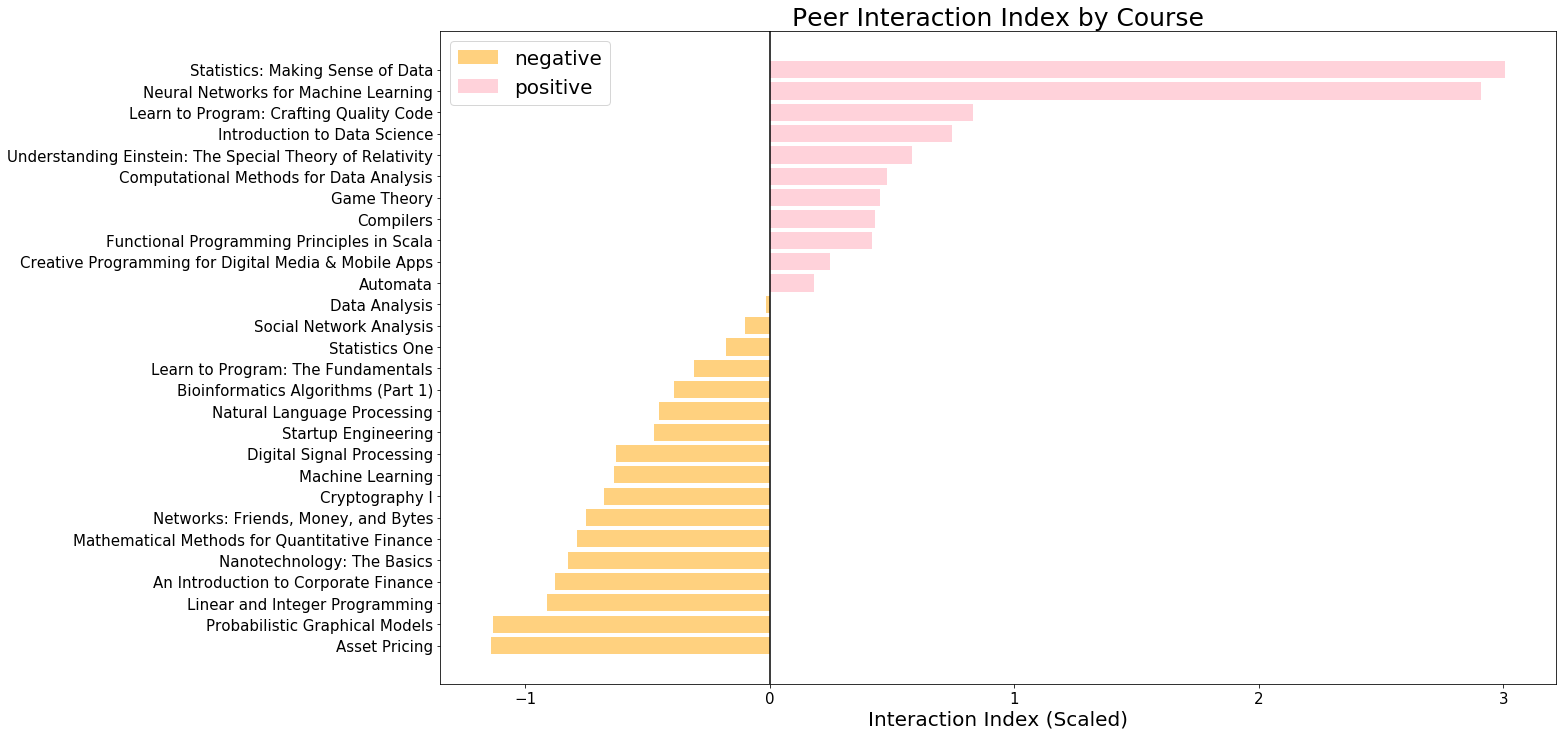

In [261]:
inter_index_pos=inter_index[inter_index['dir']=='positive']
inter_index_neg=inter_index[inter_index['dir']=='negative']# need to plot it twice

inter_index_pos.sort_values(by='interaction_index',inplace=True)
inter_index_neg.sort_values(by='interaction_index',inplace=True)# for better visualization; we sort the values before plotting them


plt.figure(figsize=(20,12))
plt.barh('name','interaction_index',data=inter_index_neg,label='negative',color='orange',alpha=0.5)
plt.barh('name','interaction_index',data=inter_index_pos,label='positive',color='pink',alpha=0.7)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Peer Interaction Index by Course',fontsize=25)
plt.xlabel('Interaction Index (Scaled)',fontsize=20)
plt.axvline(0,color='black')
plt.legend(fontsize=20)
plt.show()


In [262]:
'''
plt.figure(figsize=(20,10))
inter_index.sort_values(by='interaction_index',inplace=True)
colors=inter_index['dir'].apply(lambda x: 'y' if x=='positive' else 'b')
plt.barh('name','interaction_index',data=inter_index,color=colors,alpha=0.6)

#miss a legend here

'''

"\nplt.figure(figsize=(20,10))\ninter_index.sort_values(by='interaction_index',inplace=True)\ncolors=inter_index['dir'].apply(lambda x: 'y' if x=='positive' else 'b')\nplt.barh('name','interaction_index',data=inter_index,color=colors,alpha=0.6)\n\n#miss a legend here\n\n"

It shows that more courses have negative ineraction indices, indicating the a general weak inetraction between users and forum for these 28 quantative-related courses taught in English. The index ranges from ~ -1.2 to 2.9 with
Statistics:Making sense of data, the most active and Asset Pricing the quietest.

## 3. What is the ratio of forum posts by different types of participants across 28 courses?(post by different types of course participants)<br>
## What is the general pattern of post replies? Does a forum post elicit many replies mostly from a few users (concentrated) or fewer replies but from several users (spread out)?    

In [263]:
#stacked bar presenting the contribution of different roles to the post; real number, preparing the data
df3=df_post.groupby(['course_id','user_type']).user_type.count().to_frame()

df3= df3.rename(columns = {"user_type":"count"}).reset_index()

#transfer from long format to wide format
df3=df3.pivot(index='course_id', columns='user_type', values='count').reset_index()
df3=df3.fillna(0)

# match the course name by merging the data
df3=df3.merge(df_course_info[['course_id','name']],how='inner',on='course_id')

df3.head()

,course_id,Anonymous,Community TA,Coursera Staff,Coursera Tech Support,Instructor,Staff,Student,name
0,assetpricing-001,317.0,0.0,0.0,0.0,118.0,280.0,2310.0,Asset Pricing
1,automata-002,326.0,0.0,1.0,0.0,158.0,43.0,2187.0,Automata
2,bioinformatics-001,1337.0,433.0,1.0,0.0,381.0,0.0,7106.0,Bioinformatics Algorithms (Part 1)
3,compilers-003,168.0,0.0,0.0,0.0,0.0,42.0,2218.0,Compilers
4,compmethods-004,110.0,0.0,1.0,0.0,0.0,1.0,953.0,Computational Methods for Data Analysis


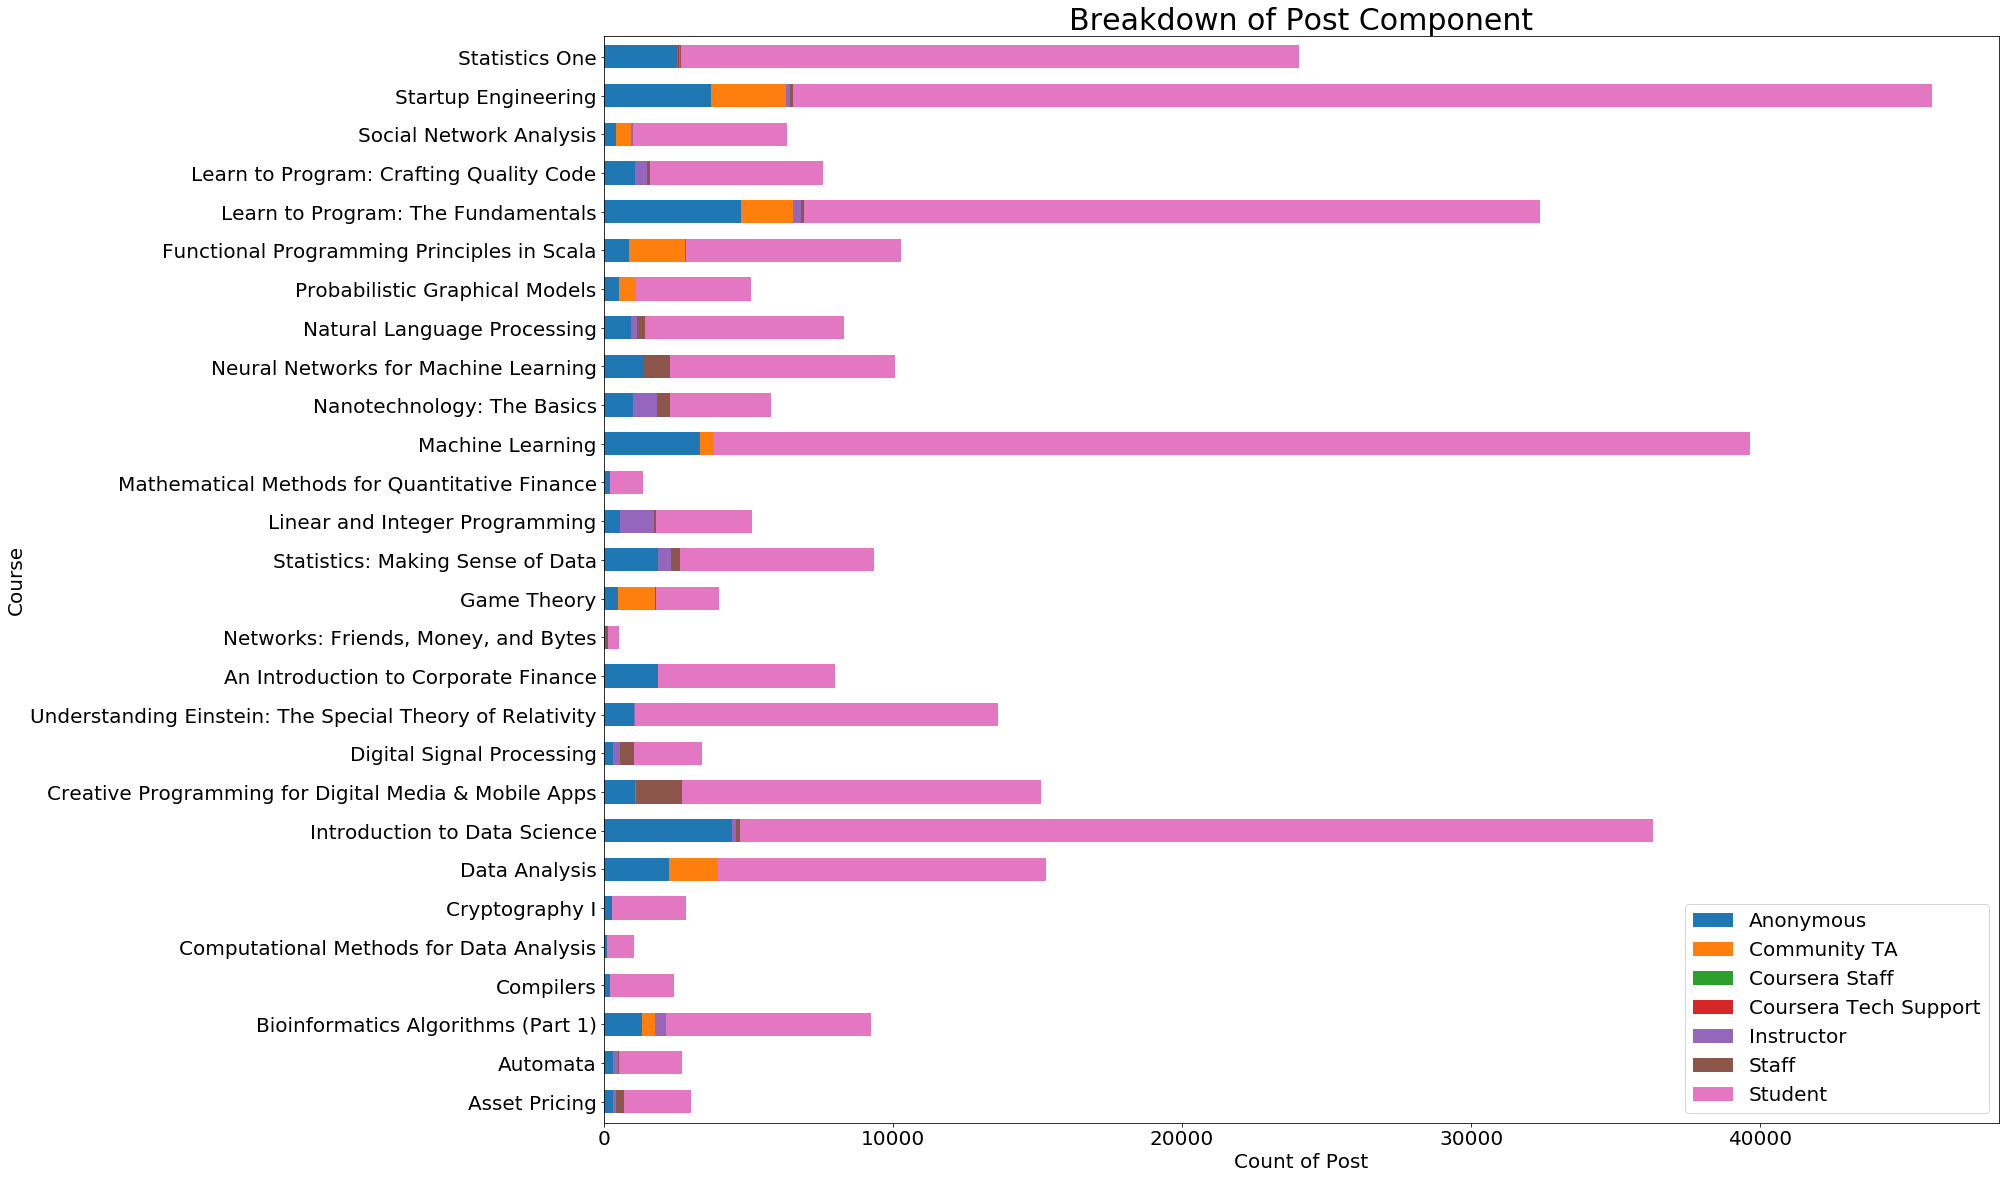

In [264]:
#stacked bar presenting the contribution of different roles to the post; real number
df3_plot=df3.plot(x='name', kind='barh', stacked=True,fontsize=20,mark_right=True,figsize=(25,20),width=0.6)
df3_plot.set_title('Breakdown of Post Component',fontsize=30)
df3_plot.set_xlabel(df3_plot.get_xlabel(),fontsize=20)

plt.xlabel('Count of Post',fontsize=20)
plt.ylabel('Course',fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [265]:
#stacked bar presenting the contribution of different roles to the post; percentage
df3p=df_post.groupby(['course_id'])["user_type"].value_counts(normalize=True).mul(100).to_frame()
df3p= df3p.rename(columns = {"user_type":"percentage"}).reset_index()
df3p

,course_id,user_type,percentage
0,assetpricing-001,Student,76.363636
1,assetpricing-001,Anonymous,10.479339
2,assetpricing-001,Staff,9.256198
3,assetpricing-001,Instructor,3.900826
4,automata-002,Student,80.552486
...,...,...,...
123,stats1-002,Anonymous,10.609086
124,stats1-002,Instructor,0.270428
125,stats1-002,Coursera Tech Support,0.128973
126,stats1-002,Staff,0.070727


In [266]:
#transfer from long format to wide format
df3p=df3p.pivot(index='course_id', columns='user_type', values='percentage').reset_index()
df3p=df3p.fillna(0)
df3p=df3p.merge(df_course_info[['course_id','name']],how='inner',on='course_id')

df3p.head()

,course_id,Anonymous,Community TA,Coursera Staff,Coursera Tech Support,Instructor,Staff,Student,name
0,assetpricing-001,10.479339,0.000000,0.000000,0.0,3.900826,9.256198,76.363636,Asset Pricing
1,automata-002,12.007366,0.000000,0.036832,0.0,5.819521,1.583794,80.552486,Automata
2,bioinformatics-001,14.441564,4.677036,0.010801,0.0,4.115360,0.000000,76.755239,Bioinformatics Algorithms (Part 1)
3,compilers-003,6.919275,0.000000,0.000000,0.0,0.000000,1.729819,91.350906,Compilers
4,compmethods-004,10.328638,0.000000,0.093897,0.0,0.000000,0.093897,89.483568,Computational Methods for Data Analysis


In [267]:
df3p.columns

Index(['course_id', 'Anonymous', 'Community TA', 'Coursera Staff',
       'Coursera Tech Support', 'Instructor', 'Staff', 'Student', 'name'],
      dtype='object')

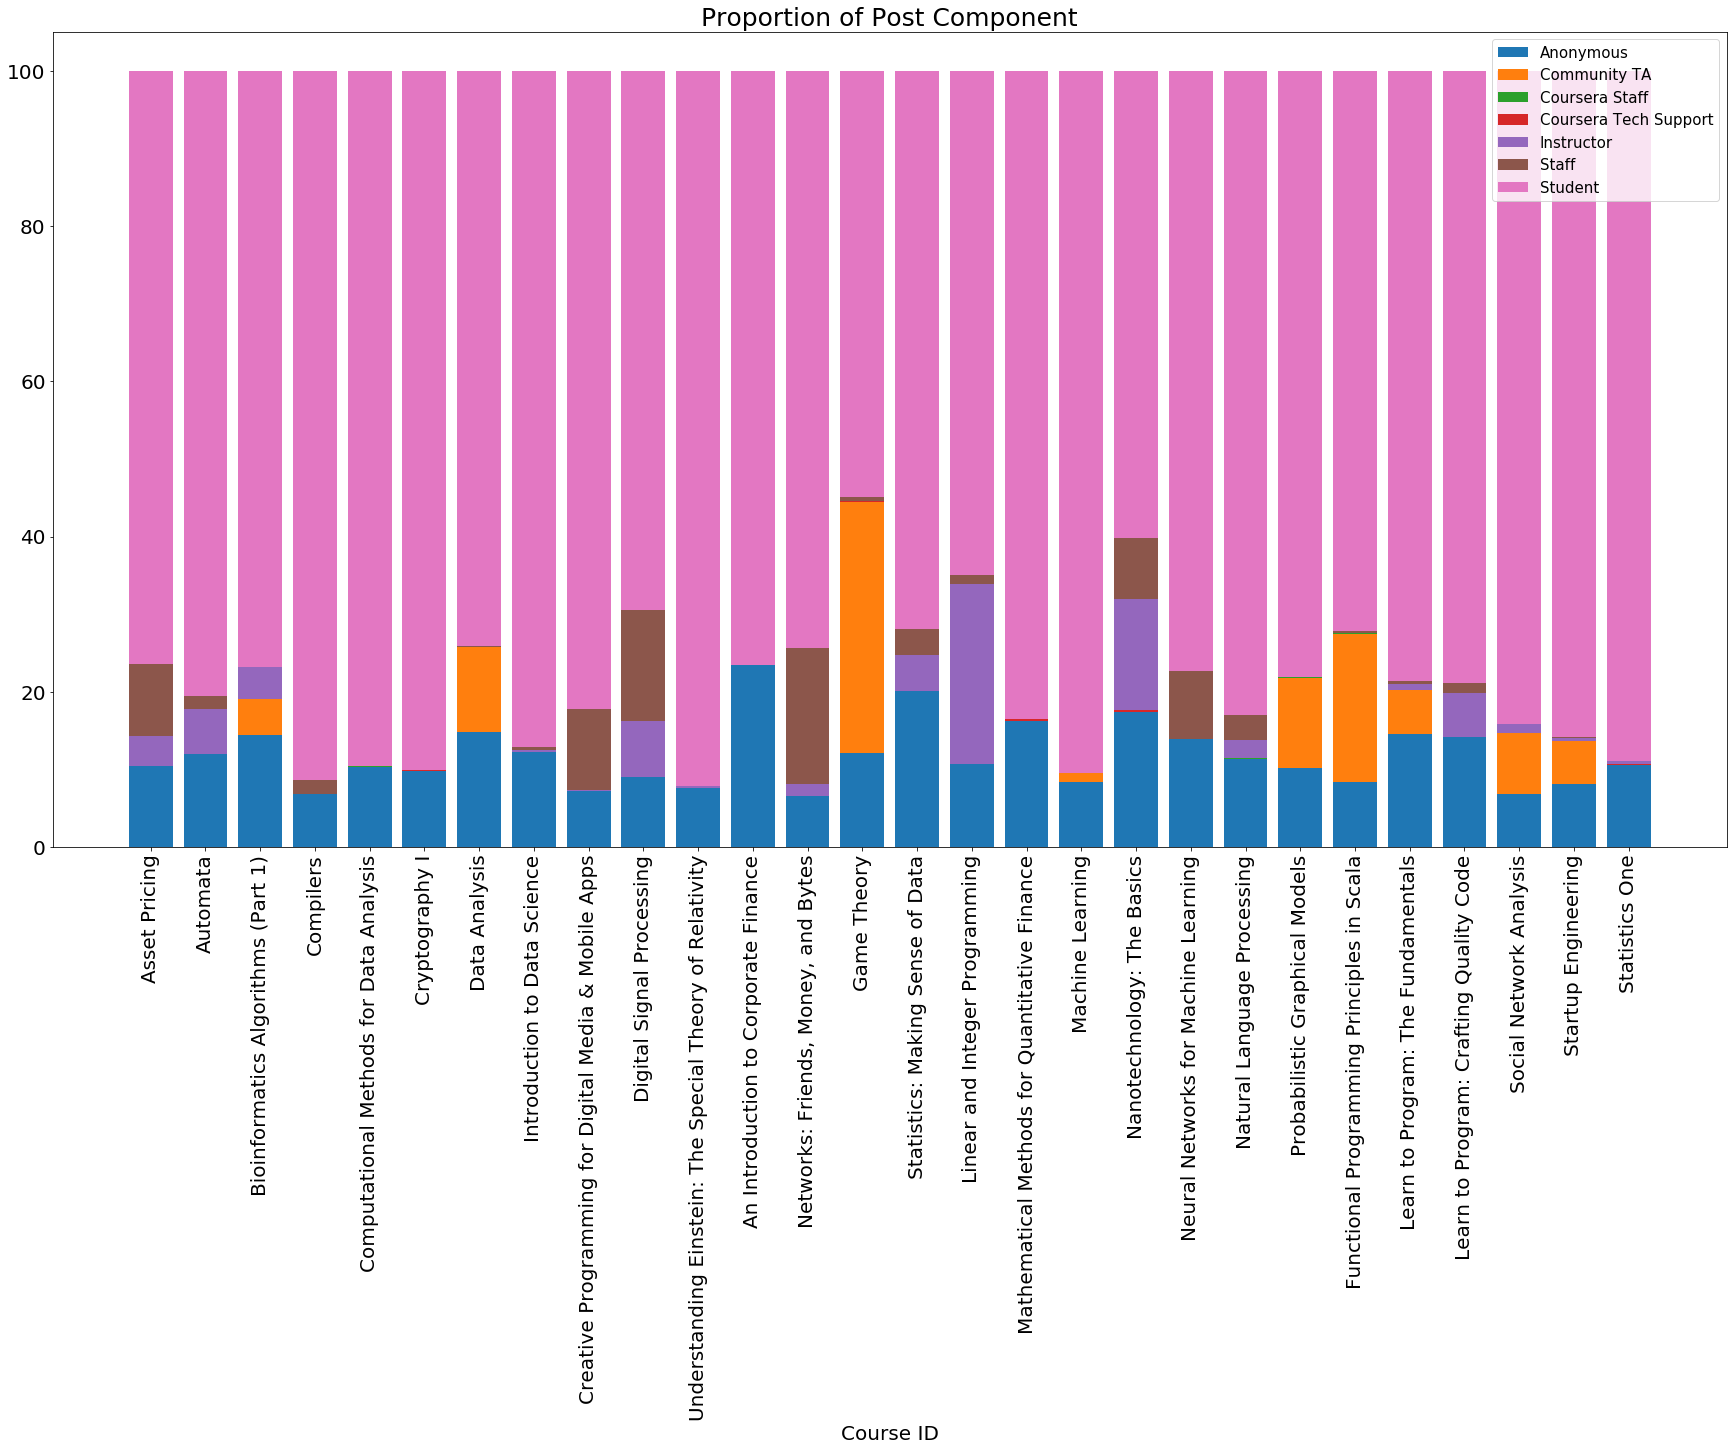

"\nPercentage stacked bar formula\nprototype\nplt.bar(x, y1,label='y1')\nplt.bar(x, y2 ,bottom=y1,label='y2')\nplt.bar(x, y3 ,bottom=y1+y2,label='y3')\n"

In [268]:
# stack bars, percentage 
dict={}
for n in list(range(1,len(df3p.columns))):
    dict[n]=df3p.iloc[:,n].to_numpy()
    
    
plt.figure(figsize=(30,15)) 
plt.bar(df3p.name,dict[1],label='Anonymous',bottom=0)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Course ID",fontsize=20)
plt.title('Proportion of Post Component',fontsize=25)
plt.bar(df3p.name,dict[2],label='Community TA',bottom=dict[1])
plt.bar(df3p.name,dict[3],label='Coursera Staff',bottom=dict[1]+dict[2])
plt.bar(df3p.name,dict[4],label='Coursera Tech Support',bottom=dict[1]+dict[2]+dict[3])
plt.bar(df3p.name,dict[5],label='Instructor',bottom=dict[1]+dict[2]+dict[3]+dict[4])
plt.bar(df3p.name,dict[6],label='Staff',bottom=dict[1]+dict[2]+dict[3]+dict[4]+dict[5])
plt.bar(df3p.name,dict[7],label='Student',bottom=dict[1]+dict[2]+dict[3]+dict[4]+dict[5]+dict[6])
plt.legend(fontsize=15)
plt.show()

    
'''
Percentage stacked bar formula
prototype
plt.bar(x, y1,label='y1')
plt.bar(x, y2 ,bottom=y1,label='y2')
plt.bar(x, y3 ,bottom=y1+y2,label='y3')
'''    


Q3: Apparently, students' post is the major component of all the forums. Some courses, Game Theory, Functional Programming Scala,Data Analysis and Probalistic Graphical Models for instance,include a medium proportion of community TAs' post. Staff's post play a huge part in some of the courses like Networks: Friends, Money, and Bytes, Digital Signal Processing and Creative Programming for Digital Media and Mobile Apps, which might involves technical support.

## 4. What is the general pattern of post replies to the same original forum post initiator(i.e. how and how many replies are given to a perosn who asks a question)?   

In [269]:
# figure out which class has the highest total number of forum replies
df_most=df_q2[['post_initiator', 'post_replier', 'course_id']].groupby('course_id').count()
df_most=df_most.rename(columns = {"post_replier":"count"}).reset_index()
df_most=df_most[['course_id','count']]
most=df_most[df_most['count']==max(df_most['count'])]
least=df_most[df_most['count']==min(df_most['count'])]

#we found that startup-001 has the highest total number of forum replies;friendsmoneybytes-002 has the lowest

In [270]:
df_inter_grid1=df_q2[['post_initiator', 'post_replier', 'course_id']].query('course_id == "startup-001"')
df_inter_grid2=df_q2[['post_initiator', 'post_replier', 'course_id']].query('course_id == "friendsmoneybytes-002"')

In [271]:
df_inter_grid1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17073 entries, 158745 to 177600
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_initiator  17073 non-null  int64  
 1   post_replier    17073 non-null  float64
 2   course_id       17073 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 533.5+ KB


In [272]:
df_inter_grid1.head()

,post_initiator,post_replier,course_id
158745,2447545679,9.669346e+09,startup-001
158746,6247448841,3.351419e+09,startup-001
158747,3451124125,4.676729e+08,startup-001
158748,9669346428,8.546136e+09,startup-001
158749,1430730236,1.722199e+09,startup-001


In [273]:
# as it is hard to visualize thousands of users in a heatmap in the following, we target users whose post reply is larger than three (>=3) which is above mean. 
df_inter_grid1.post_initiator=df_inter_grid1.post_initiator.astype('object')
df_inter_grid1_selected=df_inter_grid1.groupby('post_initiator').course_id.count().reset_index()
df_inter_grid1_selected=df_inter_grid1_selected.rename(columns={'course_id':'count'})

In [274]:
# mean count of the post in startup-001
df_inter_grid1_selected['count'].mean()

2.651910531220876

In [275]:
df_inter_grid1_selected=df_inter_grid1_selected.query('count>=3')
select_usr1=df_inter_grid1_selected['post_initiator']# get the selected users

In [276]:
# we select the post initiators that has more than 3 post, aggregately
df_inter_grid1=df_inter_grid1[df_inter_grid1['post_initiator'].isin(select_usr1)]

In [277]:
# just a view of the fist 100 data rows among these selected users (post creators)
df_inter_grid1.head(100)

,post_initiator,post_replier,course_id
158745,2447545679,9.669346e+09,startup-001
158746,6247448841,3.351419e+09,startup-001
158747,3451124125,4.676729e+08,startup-001
158750,8710879781,2.447546e+09,startup-001
158752,2832772395,2.447546e+09,startup-001
...,...,...,...
159005,547425752,1.005260e+09,startup-001
159008,322492286,4.333966e+09,startup-001
159011,7298921044,4.295439e+09,startup-001
159016,3706582264,6.672566e+08,startup-001


In [278]:
# anonymous post will be removed as it is a big distraction
df_inter_grid1=df_inter_grid1.query('post_initiator!=0 & post_replier!=0')

In [279]:
df_inter_grid1=df_inter_grid1.groupby(['post_initiator','post_replier']).count().reset_index()
df_inter_grid1=df_inter_grid1.rename(columns={'course_id':'count'})

In [280]:
df_inter_grid1=df_inter_grid1.sort_values('count',ascending=False).head(100)

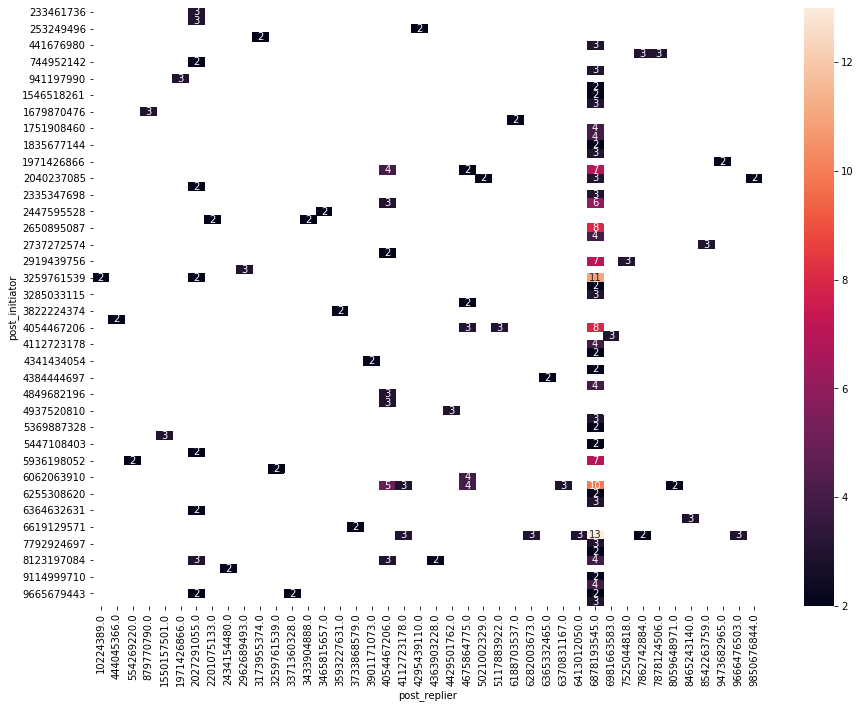

In [281]:
plt.figure(figsize=(15,11))
#ax = sns.heatmap(df_inter_grid1)

interaction_heat = df_inter_grid1.pivot("post_initiator", "post_replier", "count")
sns.heatmap(interaction_heat,annot=True)


# Project Summary

Q1: The num of user are highly correlated to num of post and num_of view, the more users we have the more post and moer views we have and vice versa. Comparatively, though remain strong correlation with num of the user, num of view correlated less strongly with num of user than the post_count did.

We could to some extent extrapolate that students were less likely to view after posting their work.

How long to finish a course appears to have little relationship with the num of users, num of views as well as num of posts.

Q2: It shows that more courses have negative ineraction indices, indicating the a general weak inetraction between users and forum for these 28 quantative-related courses taught in English. The index ranges from ~ -1.2 to 2.9 with
Statistics:Making sense of data, the most active and Asset Pricing the quietest.

Q3: Apparently, students' post is the major component of all the forums. Some courses, Game Theory, Functional Programming Scala,Data Analysis and Probalistic Graphical Models for instance,include a medium proportion of community TAs' post. Staff's post play a huge part in some of the courses like Networks: Friends, Money, and Bytes, Digital Signal Processing and Creative Programming for Digital Media and Mobile Apps, which might involves technical support.

Q4: The average reply counts is around 3. The heatmap tells us that those who have more than 3 replies often reply to more than one student. User Id 6878193545 is the most active and responsive in the forum of Startup-001.